# Step 1: Data understanding and cleaning



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Importing all datasets
data=pd.read_csv("Grip1.csv")

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Let's check the dimensions of the dataframe
data.shape

(25, 2)

In [9]:
# let's look at the statistical aspects of the dataframe
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# Adding up the missing values (column-wise)
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

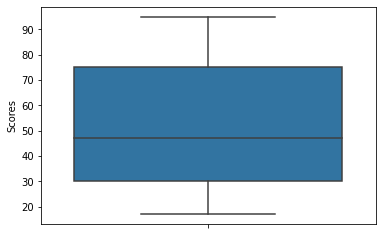

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Scores'])
plt.show()

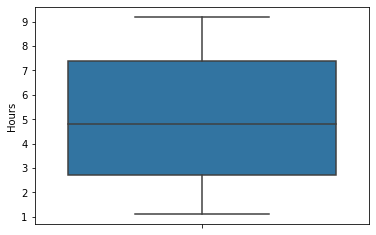

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Hours'])
plt.show()

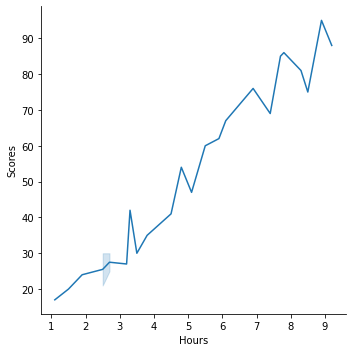

In [14]:
sns.relplot(x='Hours',y='Scores',kind='line',data=data)


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train,y_train)

LinearRegression()

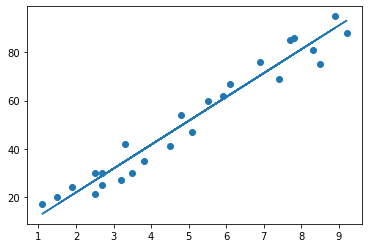

In [21]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
